## Import req packages

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline  


In [6]:
dataset = pd.read_csv("data/student.csv")


In [7]:
print(dataset.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
dataset.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Checking missing values

In [11]:
dataset.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Check duplicates

In [ ]:
dataset.duplicated().sum() # Check duplicates

np.int64(0)

In [13]:
dataset.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [ ]:
for column in dataset.columns: # Check unique values in each column
    print(f"Unique values in column '{column}': {dataset[column].unique()}")

Unique values in column 'gender': ['female' 'male']
Unique values in column 'race_ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']
Unique values in column 'parental_level_of_education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique values in column 'lunch': ['standard' 'free/reduced']
Unique values in column 'test_preparation_course': ['none' 'completed']
Unique values in column 'math_score': [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Unique values in column 'reading_score': [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
 

In [15]:
# seperate nuemeric and categorical columns
numeric_cols = dataset.select_dtypes(include=np.number).columns.tolist()
categorical_cols = dataset.select_dtypes(include='object').columns.tolist()

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['math_score', 'reading_score', 'writing_score']
Categorical Columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Feature engineering


In [17]:
# adding columns for total score and average score
dataset['total_score'] = dataset[['math_score', 'reading_score', 'writing_score']].sum(axis=1)
dataset['average_score'] = dataset['total_score'] / 3
print(dataset[['total_score', 'average_score']].head())

   total_score  average_score
0          218      72.666667
1          247      82.333333
2          278      92.666667
3          148      49.333333
4          229      76.333333


In [21]:
dataset.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
# student with fill sccore in each subject
reading_full = dataset[dataset['reading_score'] == 100]['average_score'].count()
writing_full = dataset[dataset['writing_score'] == 100]['average_score'].count()
math_full = dataset[dataset['math_score'] == 100]['average_score'].count()      

print(f"Number of students with full reading score: {reading_full}")
print(f"Number of students with full writing score: {writing_full}")
print(f"Number of students with full math score: {math_full}")      

Number of students with full reading score: 17
Number of students with full writing score: 14
Number of students with full math score: 7


In [23]:
reading_less_20 = dataset[dataset['reading_score']<=20]['average_score'].count()
writing_less_20 = dataset[dataset['writing_score']<=20]['average_score'].count()
math_less_20 = dataset[dataset['math_score']<=20]['average_score'].count()      

print(f"Number of students with less than or equal to 20 reading score: {reading_less_20}")
print(f"Number of students with less than or equal to 20 writing score: {writing_less_20}")
print(f"Number of students with less than or equal to 20 math score: {math_less_20}")

Number of students with less than or equal to 20 reading score: 1
Number of students with less than or equal to 20 writing score: 3
Number of students with less than or equal to 20 math score: 4


the results from above 2 cells show students perform very well in reading session, and poor in math.
- sign there is something's wrong about math department's approach 

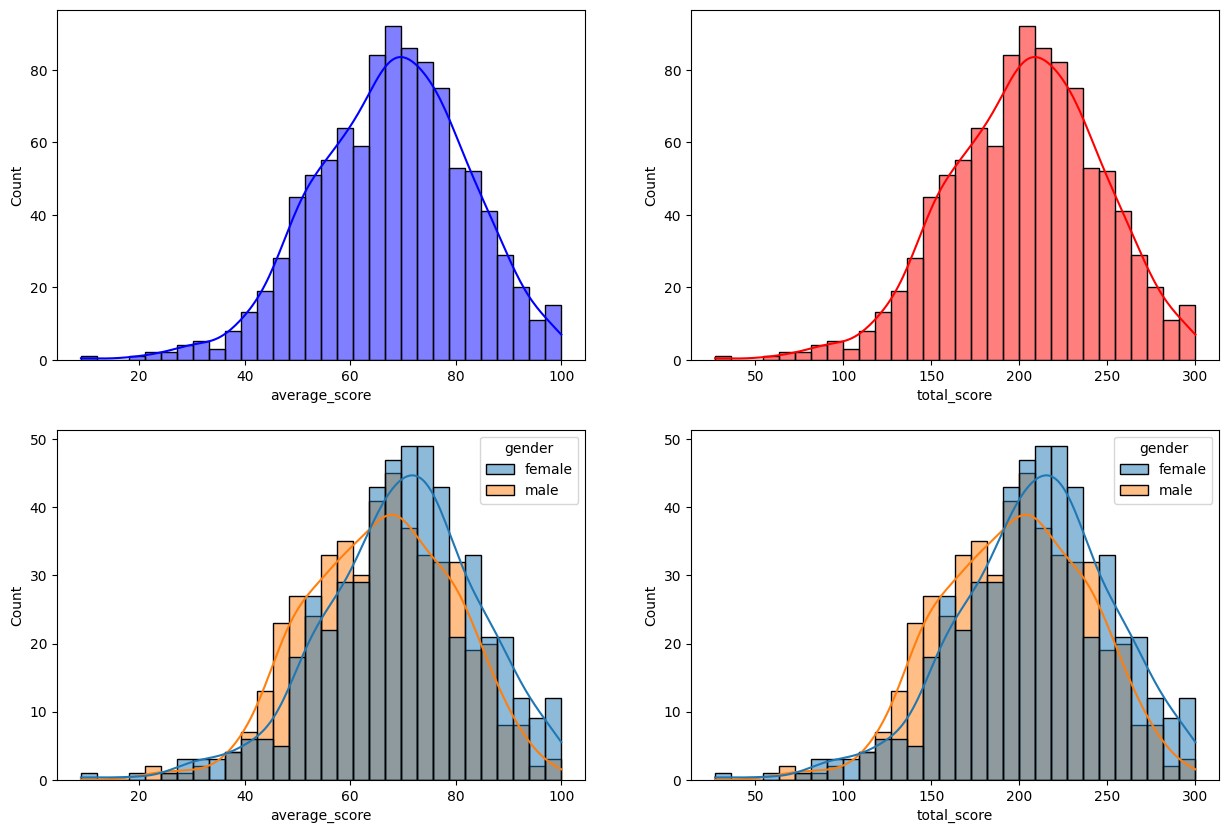

In [ ]:
### Histogram Plots
fig, axis = plt.subplots(2, 2, figsize=(15,10))

sns.histplot(data=dataset, x='average_score', bins=30, kde=True, color='b', ax=axis[0,0])
sns.histplot(data=dataset, x='total_score', bins=30, kde=True, color='r', ax=axis[0,1])
sns.histplot(data=dataset, x='average_score', bins=30, kde=True, ax=axis[1,0], hue='gender')
sns.histplot(data=dataset, x='total_score', bins=30, kde=True, ax=axis[1,1], hue='gender')
plt.show()

This shows average score across female is higher than male

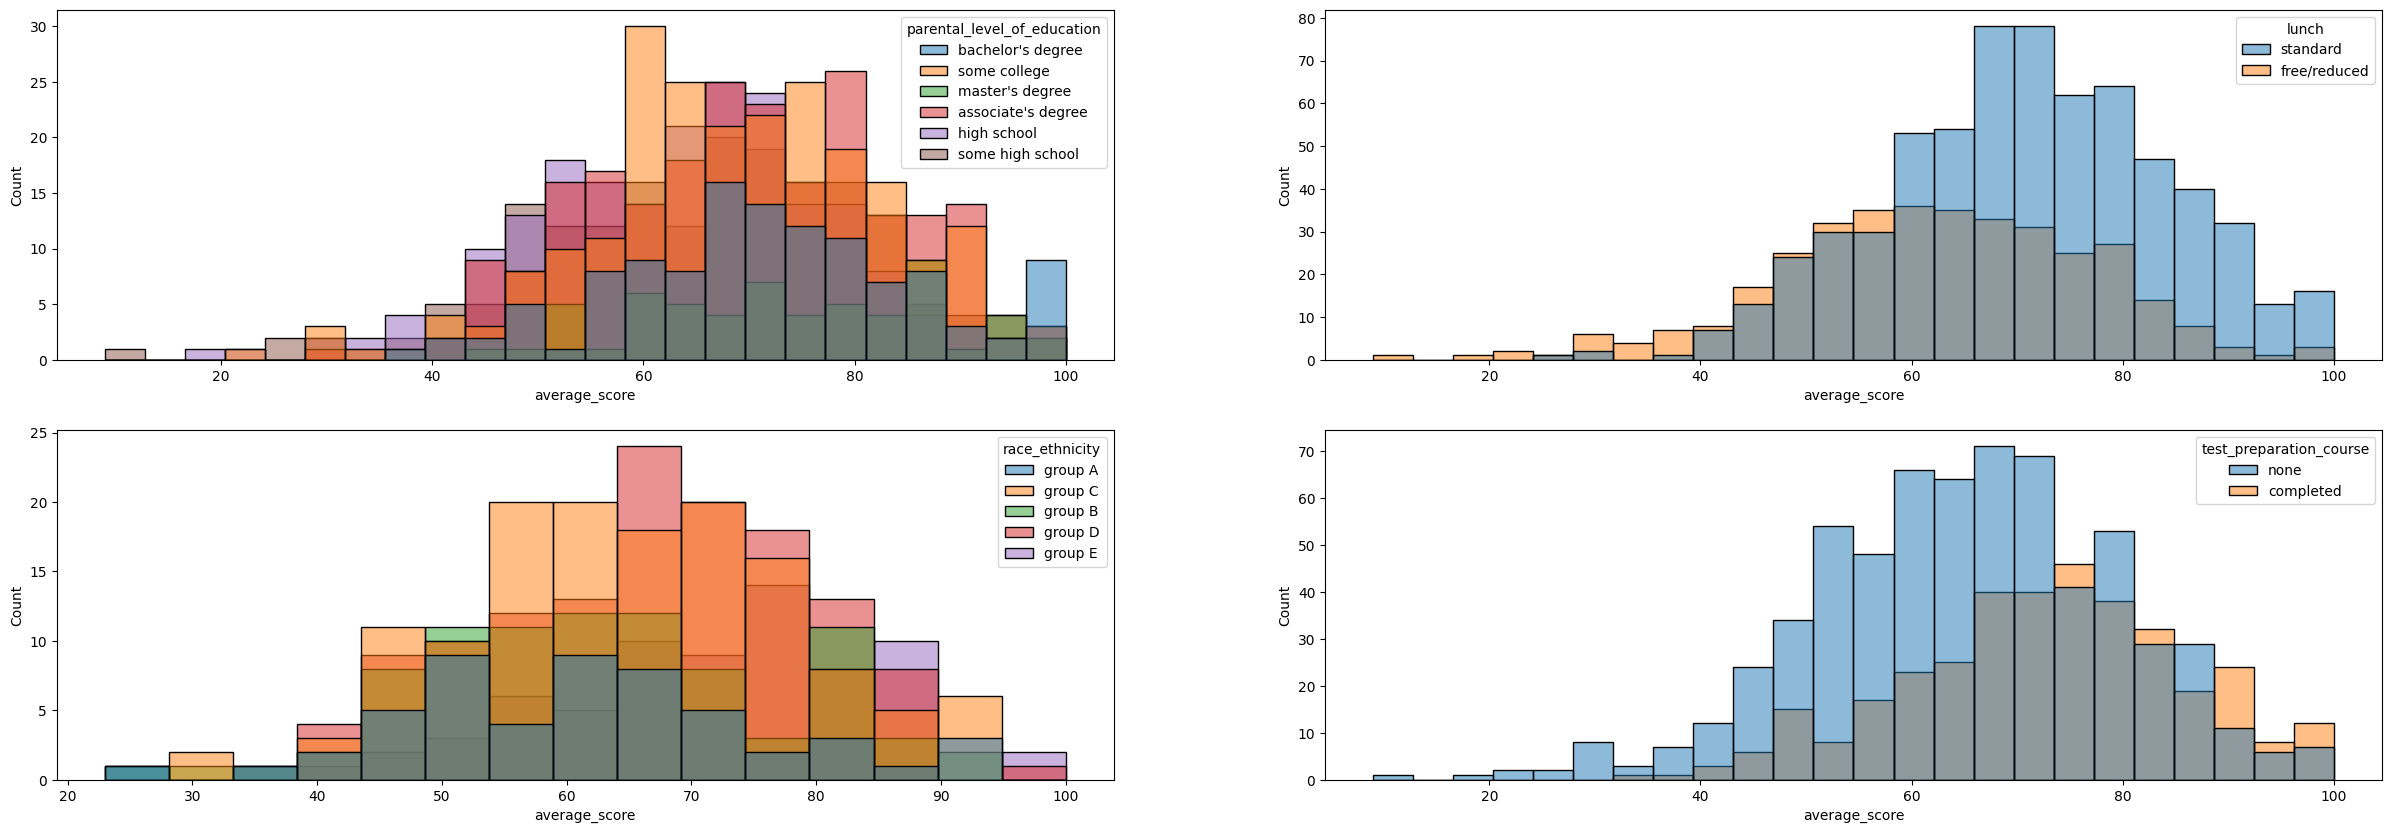

In [69]:
# performance by other features
fig, axis = plt.subplots(2, 2, figsize=(30, 10))
sns.histplot(x='average_score', hue='parental_level_of_education', data=dataset, ax=axis[0,0])
sns.histplot(x='average_score', hue='lunch', data=dataset, ax=axis[0,1])
sns.histplot(x='average_score', hue='race_ethnicity', data=dataset[dataset['gender']=='male'], ax=axis[1,0])
sns.histplot(x='average_score', hue='test_preparation_course', data=dataset, ax=axis[1,1])

plt.show()

The above plot signifies the following relations.
- Standard lunch has extremely positive effect on student performance
- in general parent's education does not help students
- test preparation course helped student to achive better scores

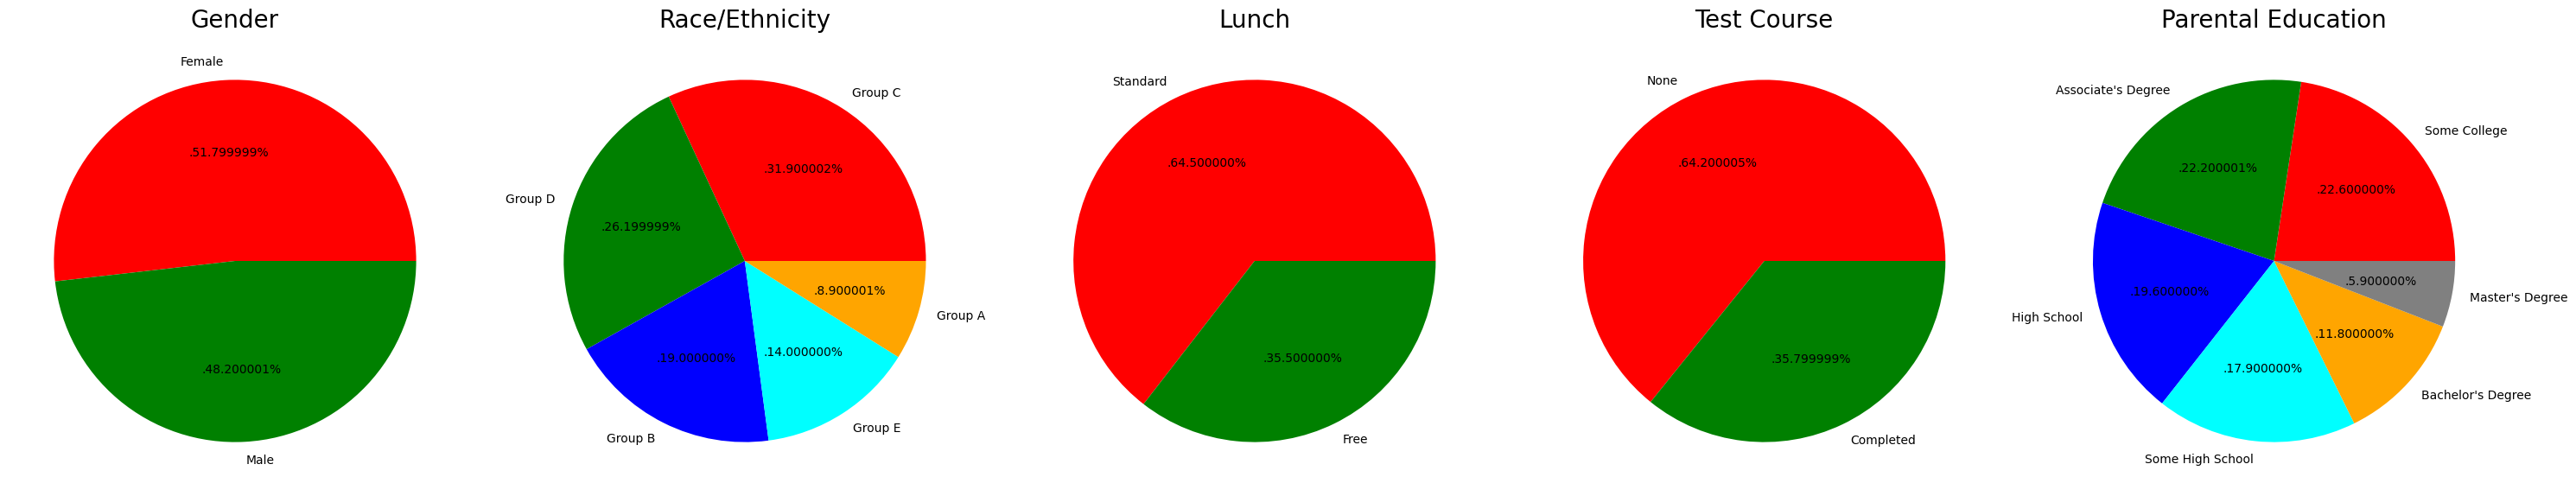

In [68]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = dataset['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = dataset['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = dataset['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = dataset['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = dataset['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()